Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
#anltdate="2021-XX-XX"
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

'''2021-01-12'''
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+-

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [2]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

'''2021-01-12'''
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [3]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### Input date for analysis
from datetime import datetime
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

#sc.stop()
#exit()
import os 
# printing environment variables
print(os.environ)

'''2021-01-12'''
environ({'CONDA_SHLVL': '1', 'LS_COLORS': 'rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;43:ca=30;41:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.tar=01;31:*.tgz=01;31:*.arc=01;31:*.arj=01;31:*.taz=01;31:*.lha=01;31:*.lz4=01;31:*.lzh=01;31:*.lzma=01;31:*.tlz=01;31:*.txz=01;31:*.tzo=01;31:*.t7z=01;31:*.zip=01;31:*.z=01;31:*.Z=01;31:*.dz=01;31:*.gz=01;31:*.lrz=01;31:*.lz=01;31:*.lzo=01;31:*.xz=01;31:*.zst=01;31:*.tzst=01;31:*.bz2=01;31:*.bz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tz=01;31:*.deb=01;31:*.rpm=01;31:*.jar=01;31:*.war=01;31:*.ear=01;31:*.sar=01;31:*.rar=01;31:*.alz=01;31:*.ace=01;31:*.zoo=01;31:*.cpio=01;31:*.7z=01;31:*.rz=01;31:*.cab=01;31:*.wim=01;31:*.swm=01;31:*.dwm=01;31:*.esd=01;31:*.jpg=01;35:*.jpeg=01;35:*.mjpg=01;35:*.mjpeg=01;35:*.gif=01;35:*.bmp=01;35:*.pbm=01;35:*.pgm=01;35:*.ppm=01;35:*.tga=01;35:*.xbm=01;35:*.xpm=01;35:*.tif=01;35:*.tiff=01;35:*.png=01;35:*.svg=01;35:*.svgz=01;35:*.mng=01;35:*

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [4]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2021-01-12  Afghanistan_nan         0          49.0         206.0   
1  2021-01-12      Albania_nan         0         376.0        1593.0   
2  2021-01-12      Algeria_nan         0         225.0         712.0   
3  2021-01-12      Andorra_nan         0           0.0          97.0   
4  2021-01-12       Angola_nan         0          61.0         188.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         527.0              53538.0               53792.0  35530000.0   
1        4348.0              63971.0               64696.0   2878445.0   
2        1724.0             102369.0              102627.0  41320000.0   
3         337.0               8586.0                8675.0     77239.0   
4         570.0              18254.0               18350.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001507   
1                                       0.022224   
2                                       0.002477   
3                                       0.111173   
4                                       0.000555   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.015069                    254.0   
1                                           0.222245                    725.0   
2                                           0.024775                    258.0   
3                                           1.111730                     89.0   
4                                           0.005554                     96.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    7.148888              75.285713   
1                  251.872101             621.142883   
2                    6.243950             246.285721   
3                 1152.267578              48.142857   
4                    2.920928              81.428574   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           2.966507      
1                                         302.107574      
2                                           8.344627      
3                                         872.616150      
4                                           3.468601

In [5]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date} order by date desc, region desc limit 5

date                  region confirmed  1_day_change  3_day_change  \
0  2021-01-12          Uzbekistan_nan         0          39.0         126.0   
1  2021-01-12             Vanuatu_nan         0           0.0           0.0   
2  2021-01-12           Venezuela_nan         0         373.0        1316.0   
3  2021-01-12             Vietnam_nan         0           1.0           3.0   
4  2021-01-12  West Bank and Gaza_nan         0         771.0        2097.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         353.0              77611.0               77665.0  33363556.0   
1           0.0                  1.0                   1.0  10000000.0   
2        2576.0             116983.0              117290.0  28435940.0   
3          18.0               1515.0                1520.0  95540000.0   
4        5943.0             148171.0              149126.0   4543126.0   

   population_percentage_infected_rate_confirmed  \
0                                   2.326251e-03   
1                                   2.000000e-07   
2                                   4.113949e-03   
3                                   1.586770e-05   
4                                   3.261454e-02   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.023263                     54.0   
1                                           0.000002                      0.0   
2                                           0.041139                    307.0   
3                                           0.000159                      5.0   
4                                           0.326145                    955.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    1.618533              50.428570   
1                    0.000000               0.000000   
2                   10.796197             368.000000   
3                    0.052334               2.571429   
4                  210.207687             849.000000   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           2.116081      
1                                           0.000000      
2                                          18.117916      
3                                           0.037681      
4                                         261.626038

In [6]:
print(configs)

{'analytics_date': "'''2021-01-12'''"}


### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2021-01-12         United States_nan          248650.281250   
1   2021-01-12        United Kingdom_nan           57850.714844   
2   2021-01-12                Brazil_nan           53980.000000   
3   2021-01-12                Russia_nan           23282.142578   
4   2021-01-12                 Spain_nan           21848.285156   
5   2021-01-12               Germany_nan           20700.000000   
6   2021-01-12          South Africa_nan           19042.000000   
7   2021-01-12                France_nan           17941.142578   
8   2021-01-12                 Italy_nan           17539.572266   
9   2021-01-12                 India_nan           17476.427734   
10  2021-01-12              Colombia_nan           16538.857422   
11  2021-01-12               Czechia_nan           12677.142578   
12  2021-01-12                Mexico_nan           12344.857422   
13  2021-01-12             Argentina_nan           11711.571289   
14  2021-01-12                Turkey_nan           11552.713867   
15  2021-01-12                Poland_nan            9634.000000   
16  2021-01-12             Indonesia_nan            9230.713867   
17  2021-01-12              Portugal_nan            8238.571289   
18  2021-01-12                Israel_nan            7557.143066   
19  2021-01-12                Sweden_nan            7441.714355   
20  2021-01-12           Netherlands_nan            7219.571289   
21  2021-01-12                 Japan_nan            6445.856934   
22  2021-01-12               Ireland_nan            6363.143066   
23  2021-01-12               Ukraine_nan            6174.143066   
24  2021-01-12                  Iran_nan            6158.143066   
25  2021-01-12               Lebanon_nan            4321.714355   
26  2021-01-12               Romania_nan            4244.571289   
27  2021-01-12                 Chile_nan            3607.285645   
28  2021-01-12                Panama_nan            3589.000000   
29  2021-01-12            Canada_Ontario            3561.142822   
30  2021-01-12           Switzerland_nan            3220.714355   
31  2021-01-12              Slovakia_nan            2995.714355   
32  2021-01-12  United Arab Emirates_nan            2607.142822   
33  2021-01-12             Canada_Quebec            2548.571533   
34  2021-01-12               Tunisia_nan            2507.714355   
35  2021-01-12              Malaysia_nan            2486.571533   
36  2021-01-12              Pakistan_nan            2317.857178   
37  2021-01-12                  Peru_nan            2244.142822   
38  2021-01-12                Serbia_nan            2171.000000   
39  2021-01-12               Austria_nan            2121.142822   
40  2021-01-12               Hungary_nan            2115.000000   
41  2021-01-12               Belgium_nan            2048.000000   
42  2021-01-12              Slovenia_nan            1979.285767   
43  2021-01-12             Lithuania_nan            1778.428589   
44  2021-01-12               Belarus_nan            1737.428589   
45  2021-01-12               Denmark_nan            1705.428589   
46  2021-01-12               Bolivia_nan            1659.571411   
47  2021-01-12           Philippines_nan            1567.857178   
48  2021-01-12               Georgia_nan            1431.000000   
49  2021-01-12               Morocco_nan            1312.285767   
50  2021-01-12                Jordan_nan            1262.714233   
51  2021-01-12    Dominican Republic_nan            1129.714233   
52  2021-01-12            Costa Rica_nan            1089.285767   
53  2021-01-12                 Egypt_nan            1041.285767   
54  2021-01-12               Croatia_nan             986.285706   
55  2021-01-12                Latvia_nan             968.714294   
56  2021-01-12              Paraguay_nan             956.857117   
57  2021-01-12                Zambia_nan             943.285706   
58  2021-01-12            Canada_Alberta             936.

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2021-01-12           United States_nan          248650.281250   
1   2021-01-12          United Kingdom_nan           57850.714844   
2   2021-01-12                  Brazil_nan           53980.000000   
3   2021-01-12                  Russia_nan           23282.142578   
4   2021-01-12                   Spain_nan           21848.285156   
5   2021-01-12                 Germany_nan           20700.000000   
6   2021-01-12            South Africa_nan           19042.000000   
7   2021-01-12                  France_nan           17941.142578   
8   2021-01-12                   Italy_nan           17539.572266   
9   2021-01-12                Colombia_nan           16538.857422   
10  2021-01-12                 Czechia_nan           12677.142578   
11  2021-01-12                  Mexico_nan           12344.857422   
12  2021-01-12               Argentina_nan           11711.571289   
13  2021-01-12                  Turkey_nan           11552.713867   
14  2021-01-12                  Poland_nan            9634.000000   
15  2021-01-12                Portugal_nan            8238.571289   
16  2021-01-12                  Israel_nan            7557.143066   
17  2021-01-12                  Sweden_nan            7441.714355   
18  2021-01-12             Netherlands_nan            7219.571289   
19  2021-01-12                 Ireland_nan            6363.143066   
20  2021-01-12                 Ukraine_nan            6174.143066   
21  2021-01-12                    Iran_nan            6158.143066   
22  2021-01-12                 Lebanon_nan            4321.714355   
23  2021-01-12                 Romania_nan            4244.571289   
24  2021-01-12                   Chile_nan            3607.285645   
25  2021-01-12                  Panama_nan            3589.000000   
26  2021-01-12              Canada_Ontario            3561.142822   
27  2021-01-12             Switzerland_nan            3220.714355   
28  2021-01-12                Slovakia_nan            2995.714355   
29  2021-01-12    United Arab Emirates_nan            2607.142822   
..         ...                         ...                    ...   
48  2021-01-12                  Latvia_nan             968.714294   
49  2021-01-12                Paraguay_nan             956.857117   
50  2021-01-12              Canada_Alberta             936.571411   
51  2021-01-12                Zimbabwe_nan             924.000000   
52  2021-01-12      West Bank and Gaza_nan             849.000000   
53  2021-01-12                 Uruguay_nan             782.142883   
54  2021-01-12                Honduras_nan             757.571411   
55  2021-01-12                Bulgaria_nan             721.571411   
56  2021-01-12                  Norway_nan             665.428589   
57  2021-01-12                  Greece_nan             664.714294   
58  2021-01-12                 Albania_nan             621.142883   
59  2021-01-12                 Estonia_nan             612.000000   
60  2021-01-12              Azerbaijan_nan             604.000000   
61  2021-01-12     Canada_British Columbia             558.000000   
62  2021-01-12                   Libya_nan             486.142853   
63  2021-01-12                 Moldova_nan             479.000000   
64  2021-01-12                 Namibia_nan             459.428558   
65  2021-01-12              Montenegro_nan             455.571442   
66  2021-01-12                  Kuwait_nan             446.571442   
67  2021-01-12                  Cyprus_nan             428.428558   
68  2021-01-12  Bosnia and Herzegovina_nan             426.857147   
69  2021-01-12                 Lesotho_nan             390.142853   
70  2021-01-12         North Macedonia_nan             352.571442   
71  2021-01-12         Canada_Saskatchewan             307.857147   
72  2021-01-12                 Bahrain_nan             301.857147   
73  2021-01-12                 Armenia_nan             295.428558   
74  2021

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2021-01-12         United States_nan          248650.281250   
1   2021-01-12        United Kingdom_nan           57850.714844   
2   2021-01-12                Brazil_nan           53980.000000   
3   2021-01-12                 Spain_nan           21848.285156   
4   2021-01-12               Germany_nan           20700.000000   
5   2021-01-12          South Africa_nan           19042.000000   
6   2021-01-12                France_nan           17941.142578   
7   2021-01-12                 Italy_nan           17539.572266   
8   2021-01-12              Colombia_nan           16538.857422   
9   2021-01-12               Czechia_nan           12677.142578   
10  2021-01-12             Argentina_nan           11711.571289   
11  2021-01-12                Poland_nan            9634.000000   
12  2021-01-12              Portugal_nan            8238.571289   
13  2021-01-12                Israel_nan            7557.143066   
14  2021-01-12                Sweden_nan            7441.714355   
15  2021-01-12           Netherlands_nan            7219.571289   
16  2021-01-12               Ireland_nan            6363.143066   
17  2021-01-12               Lebanon_nan            4321.714355   
18  2021-01-12               Romania_nan            4244.571289   
19  2021-01-12                 Chile_nan            3607.285645   
20  2021-01-12                Panama_nan            3589.000000   
21  2021-01-12            Canada_Ontario            3561.142822   
22  2021-01-12           Switzerland_nan            3220.714355   
23  2021-01-12              Slovakia_nan            2995.714355   
24  2021-01-12  United Arab Emirates_nan            2607.142822   
25  2021-01-12             Canada_Quebec            2548.571533   
26  2021-01-12               Tunisia_nan            2507.714355   
27  2021-01-12                Serbia_nan            2171.000000   
28  2021-01-12               Austria_nan            2121.142822   
29  2021-01-12               Hungary_nan            2115.000000   
30  2021-01-12               Belgium_nan            2048.000000   
31  2021-01-12              Slovenia_nan            1979.285767   
32  2021-01-12             Lithuania_nan            1778.428589   
33  2021-01-12               Belarus_nan            1737.428589   
34  2021-01-12               Denmark_nan            1705.428589   
35  2021-01-12               Georgia_nan            1431.000000   
36  2021-01-12            Costa Rica_nan            1089.285767   
37  2021-01-12               Croatia_nan             986.285706   
38  2021-01-12                Latvia_nan             968.714294   
39  2021-01-12            Canada_Alberta             936.571411   
40  2021-01-12    West Bank and Gaza_nan             849.000000   
41  2021-01-12               Uruguay_nan             782.142883   
42  2021-01-12               Albania_nan             621.142883   
43  2021-01-12               Estonia_nan             612.000000   
44  2021-01-12               Namibia_nan             459.428558   
45  2021-01-12            Montenegro_nan             455.571442   
46  2021-01-12                Cyprus_nan             428.428558   
47  2021-01-12               Lesotho_nan             390.142853   
48  2021-01-12       Canada_Saskatchewan             307.857147   
49  2021-01-12               Bahrain_nan             301.857147   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         1051.684570          204652.0   
1                                         1219.009644           46169.0   
2                                          355.534241           25822.0   
3                                          655.542236           61422.0   
4                                          350.042267           11706.0   
5                                          450.708344           15046.0   
6                                          358.874115            35

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2021-01-12                  Russia_nan           23282.142578   
1   2021-01-12                  Mexico_nan           12344.857422   
2   2021-01-12                  Turkey_nan           11552.713867   
3   2021-01-12                 Ukraine_nan            6174.143066   
4   2021-01-12                 Bolivia_nan            1659.571411   
5   2021-01-12                  Jordan_nan            1262.714233   
6   2021-01-12      Dominican Republic_nan            1129.714233   
7   2021-01-12                Paraguay_nan             956.857117   
8   2021-01-12                Bulgaria_nan             721.571411   
9   2021-01-12                  Norway_nan             665.428589   
10  2021-01-12     Canada_British Columbia             558.000000   
11  2021-01-12                 Moldova_nan             479.000000   
12  2021-01-12                  Kuwait_nan             446.571442   
13  2021-01-12  Bosnia and Herzegovina_nan             426.857147   
14  2021-01-12         North Macedonia_nan             352.571442   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          225.570938           23018.0   
1                                          134.349289            7594.0   
2                                          200.146027           10220.0   
3                                          197.401215            4585.0   
4                                          198.172333            1392.0   
5                                          173.260483            1461.0   
6                                          146.113068            1179.0   
7                                          188.366928             802.0   
8                                          145.160461             620.0   
9                                          173.903305             429.0   
10                                         153.176468            1475.0   
11                                         166.156998             271.0   
12                                         151.124008             527.0   
13                                         181.916260               0.0   
14                                         237.650452             103.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        68570.0      162975.0            3389733.0  144500000.0   
1        33702.0       86414.0            1541633.0  128640792.0   
2        28895.0       80869.0            2336476.0   80810000.0   
3        15050.0       43219.0            1154850.0   43787980.0   
4         4134.0       11617.0             175288.0   11724139.0   
5         3507.0        8839.0             308670.0   10203134.0   
6         4744.0        7908.0             183282.0   10824494.0   
7         2541.0        6698.0             116535.0    7111652.0   
8         1119.0        5051.0             209131.0    6959195.0   
9         1427.0        4658.0              55903.0    5357000.0   
10        1475.0        3906.0              58107.0    5100000.0   
11         993.0        3353.0             149662.0    4035942.0   
12        1368.0        3126.0             154841.0    4137000.0   
13         713.0        2988.0             115633.0    3285028.0   
14        1003.0        2468.0              86597.0    2077000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.234584           
1                                            0.119840           
2                                            0.289132           
3                                            0.263737           
4                                            0.149511           
5                                            0.302526           
6                                            0.169322           
7                                            0.163866           
8                             

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date          region  delta_roling_7day_AVG  \
0  2021-01-12        Iran_nan            6158.143066   
1  2021-01-12    Malaysia_nan            2486.571533   
2  2021-01-12        Peru_nan            2244.142822   
3  2021-01-12    Zimbabwe_nan             924.000000   
4  2021-01-12    Honduras_nan             757.571411   
5  2021-01-12      Greece_nan             664.714294   
6  2021-01-12  Azerbaijan_nan             604.000000   
7  2021-01-12       Libya_nan             486.142853   
8  2021-01-12       Qatar_nan             203.428574   
9  2021-01-12    Botswana_nan             200.000000   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         102.644264            6208.0   
1                                         110.094879            2232.0   
2                                          95.580536            9004.0   
3                                          87.035362             820.0   
4                                         107.081482             756.0   
5                                          86.648048             441.0   
6                                          83.560966             176.0   
7                                          99.049789             633.0   
8                                          99.224602             203.0   
9                                         119.066505             718.0   

   3_day_change  7_day_change  confirmed_yesterday  population  \
0       18100.0       43107.0            1292614.0  83993000.0   
1        7116.0       17406.0             138224.0  31620000.0   
2        9004.0       15709.0            1035184.0  32870710.0   
3        2637.0        6468.0              22297.0  14862924.0   
4        3144.0        5303.0             128701.0   9904607.0   
5        1685.0        4653.0             145179.0  10740000.0   
6        1410.0        4228.0             224827.0  10119557.0   
7        1376.0        3403.0             105378.0   6871292.0   
8         602.0        1424.0             146068.0   2870256.0   
9         718.0        1400.0              16768.0   2351627.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.153896                   6182.0   
1                                           0.043714                   2596.0   
2                                           0.314926                  -1363.0   
3                                           0.015002                    916.0   
4                                           0.129942                    528.0   
5                                           0.135177                    766.0   
6                                           0.222172                    796.0   
7                                           0.153361                    361.0   
8                                           0.508906                    207.0   
9                                           0.071308                    -28.0   

   delta_new_cases_per_1M_hab  
0                   73.601372  
1                   82.099937  
2                  -41.465488  
3                   61.629864  
4                   53.308525  
5                   71.322159  
6                   78.659569  
7                   52.537426  
8                   72.119003  
9                  -11.906651

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2021-01-12        Congo (Kinshasa)_nan             191.857147   
1   2021-01-12                    Oman_nan             170.857147   
2   2021-01-12            Burkina Faso_nan             164.714279   
3   2021-01-12           Cote d'Ivoire_nan             156.285721   
4   2021-01-12                   Ghana_nan             151.714279   
5   2021-01-12              Kyrgyzstan_nan             141.714279   
6   2021-01-12                  Rwanda_nan             133.714279   
7   2021-01-12            Saudi Arabia_nan             113.428574   
8   2021-01-12              Mauritania_nan             105.142860   
9   2021-01-12                   Syria_nan              94.714287   
10  2021-01-12                  Angola_nan              81.428574   
11  2021-01-12             Afghanistan_nan              75.285713   
12  2021-01-12                   Niger_nan              65.571426   
13  2021-01-12                 Jamaica_nan              62.000000   
14  2021-01-12                    Mali_nan              57.714287   
15  2021-01-12              Uzbekistan_nan              50.428570   
16  2021-01-12              France_Reunion              46.000000   
17  2021-01-12                 China_Hebei              41.142857   
18  2021-01-12             China_Hong Kong              38.000000   
19  2021-01-12                   Haiti_nan              37.000000   
20  2021-01-12              Madagascar_nan              33.428570   
21  2021-01-12                  Guyana_nan              29.857143   
22  2021-01-12               Singapore_nan              29.714285   
23  2021-01-12                 Eritrea_nan              27.571428   
24  2021-01-12                  Guinea_nan              25.857143   
25  2021-01-12                   Gabon_nan              19.285715   
26  2021-01-12                 Iceland_nan              14.714286   
27  2021-01-12     Trinidad and Tobago_nan              13.571428   
28  2021-01-12           France_Guadeloupe              11.714286   
29  2021-01-12                 Bahamas_nan              11.428572   
30  2021-01-12   Australia_New South Wales               8.714286   
31  2021-01-12               Nicaragua_nan               7.285714   
32  2021-01-12             New Zealand_nan               5.142857   
33  2021-01-12              China_Shanghai               4.571429   
34  2021-01-12                Djibouti_nan               4.428571   
35  2021-01-12           France_Martinique               3.714286   
36  2021-01-12              China_Liaoning               3.428571   
37  2021-01-12  United Kingdom_Isle of Man               3.285714   
38  2021-01-12     Congo (Brazzaville)_nan               2.857143   
39  2021-01-12        Australia_Queensland               2.714286   
40  2021-01-12             China_Guangdong               2.714286   
41  2021-01-12                 Taiwan*_nan               2.714286   
42  2021-01-12                 Vietnam_nan               2.571429   
43  2021-01-12       Equatorial Guinea_nan               2.428571   
44  2021-01-12          Australia_Victoria               1.714286   
45  2021-01-12                Cambodia_nan               1.428571   
46  2021-01-12                China_Fujian               1.428571   
47  2021-01-12               China_Tianjin               1.285714   
48  2021-01-12               China_Shaanxi               1.142857   
49  2021-01-12              Tajikistan_nan               1.142857   
50  2021-01-12   Australia_South Australia               1.000000   
51  2021-01-12               China_Beijing               0.714286   
52  2021-01-12          China_Heilongjiang               0.428571   
53  2021-01-12                 China_Henan               0.285714   
54  2021-01-12               China_Jiangsu               0.285714   
55  2021-01-12              China_Zhejiang               0.285714   
56  2021-01-12                 China_Hunan               0.142857   
57  2021

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60    

date                      region  delta_roling_7day_AVG  \
0   2021-01-12        Congo (Kinshasa)_nan             191.857147   
1   2021-01-12                    Oman_nan             170.857147   
2   2021-01-12            Burkina Faso_nan             164.714279   
3   2021-01-12           Cote d'Ivoire_nan             156.285721   
4   2021-01-12                   Ghana_nan             151.714279   
5   2021-01-12              Kyrgyzstan_nan             141.714279   
6   2021-01-12                  Rwanda_nan             133.714279   
7   2021-01-12            Saudi Arabia_nan             113.428574   
8   2021-01-12              Mauritania_nan             105.142860   
9   2021-01-12                   Syria_nan              94.714287   
10  2021-01-12                  Angola_nan              81.428574   
11  2021-01-12             Afghanistan_nan              75.285713   
12  2021-01-12                   Niger_nan              65.571426   
13  2021-01-12                 Jamaica_nan              62.000000   
14  2021-01-12                    Mali_nan              57.714287   
15  2021-01-12              Uzbekistan_nan              50.428570   
16  2021-01-12              France_Reunion              46.000000   
17  2021-01-12                 China_Hebei              41.142857   
18  2021-01-12             China_Hong Kong              38.000000   
19  2021-01-12                   Haiti_nan              37.000000   
20  2021-01-12              Madagascar_nan              33.428570   
21  2021-01-12                  Guyana_nan              29.857143   
22  2021-01-12               Singapore_nan              29.714285   
23  2021-01-12                 Eritrea_nan              27.571428   
24  2021-01-12                  Guinea_nan              25.857143   
25  2021-01-12                   Gabon_nan              19.285715   
26  2021-01-12                 Iceland_nan              14.714286   
27  2021-01-12     Trinidad and Tobago_nan              13.571428   
28  2021-01-12           France_Guadeloupe              11.714286   
29  2021-01-12                 Bahamas_nan              11.428572   
30  2021-01-12   Australia_New South Wales               8.714286   
31  2021-01-12               Nicaragua_nan               7.285714   
32  2021-01-12             New Zealand_nan               5.142857   
33  2021-01-12              China_Shanghai               4.571429   
34  2021-01-12                Djibouti_nan               4.428571   
35  2021-01-12           France_Martinique               3.714286   
36  2021-01-12              China_Liaoning               3.428571   
37  2021-01-12  United Kingdom_Isle of Man               3.285714   
38  2021-01-12     Congo (Brazzaville)_nan               2.857143   
39  2021-01-12        Australia_Queensland               2.714286   
40  2021-01-12             China_Guangdong               2.714286   
41  2021-01-12                 Taiwan*_nan               2.714286   
42  2021-01-12                 Vietnam_nan               2.571429   
43  2021-01-12       Equatorial Guinea_nan               2.428571   
44  2021-01-12          Australia_Victoria               1.714286   
45  2021-01-12                Cambodia_nan               1.428571   
46  2021-01-12                China_Fujian               1.428571   
47  2021-01-12               China_Tianjin               1.285714   
48  2021-01-12               China_Shaanxi               1.142857   
49  2021-01-12              Tajikistan_nan               1.142857   
50  2021-01-12   Australia_South Australia               1.000000   
51  2021-01-12               China_Beijing               0.714286   
52  2021-01-12          China_Heilongjiang               0.428571   
53  2021-01-12                 China_Henan               0.285714   
54  2021-01-12               China_Jiangsu               0.285714   
55  2021-01-12              China_Zhejiang               0.285714   
56  2021-01-12                 China_Hunan               0.142857   
57  2021

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG < 0.428571 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 ) 
    order by delta_roling_7day_AVG desc, region asc
limit 60  

date                                      region  \
0   2021-01-12                                 China_Henan   
1   2021-01-12                               China_Jiangsu   
2   2021-01-12                              China_Zhejiang   
3   2021-01-12                                 China_Hunan   
4   2021-01-12                              China_Shandong   
5   2021-01-12                                China_Shanxi   
6   2021-01-12                                China_Yunnan   
7   2021-01-12                                Cameroon_nan   
8   2021-01-12                                 China_Anhui   
9   2021-01-12                             China_Chongqing   
10  2021-01-12                                 China_Gansu   
11  2021-01-12                               China_Guangxi   
12  2021-01-12                               China_Guizhou   
13  2021-01-12                                China_Hainan   
14  2021-01-12                                 China_Hubei   
15  2021-01-12                        China_Inner Mongolia   
16  2021-01-12                               China_Jiangxi   
17  2021-01-12                                 China_Jilin   
18  2021-01-12                                 China_Macau   
19  2021-01-12                               China_Ningxia   
20  2021-01-12                               China_Qinghai   
21  2021-01-12                               China_Sichuan   
22  2021-01-12                                 China_Tibet   
23  2021-01-12                              China_Xinjiang   
24  2021-01-12                                Holy See_nan   
25  2021-01-12                                   Sudan_nan   
26  2021-01-12  United Kingdom_Falkland Islands (Malvinas)   
27  2021-01-12                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0                0.285714   
1                0.285714   
2                0.285714   
3                0.142857   
4                0.142857   
5                0.142857   
6                0.142857   
7                0.000000   
8                0.000000   
9                0.000000   
10               0.000000   
11               0.000000   
12               0.000000   
13               0.000000   
14               0.000000   
15               0.000000   
16               0.000000   
17               0.000000   
18               0.000000   
19               0.000000   
20               0.000000   
21               0.000000   
22               0.000000   
23               0.000000   
24               0.000000   
25               0.000000   
26               0.000000   
27               0.000000   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                            0.004255               1.0   
1                                            0.004975               0.0   
2                                            0.006972               0.0   
3                                            0.003045               0.0   
4                                            0.002163               0.0   
5                                            0.005479               0.0   
6                                            0.004351               0.0   
7                                            0.000000               0.0   
8                                            0.000000               0.0   
9                                            0.000000               0.0   
10                                           0.000000               0.0   
11                                           0.000000               0.0   
12                                           0.000000               0.0   
13                                           0.000000               0.0   
14                                           0.000000               0.0   
15                                           0.000000               0.0   
16                                           0.000000               0.0   
17                 

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 40 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [18]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 10 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [19]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 5 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 5 and
    population in (10000000.0 )
order by region asc
limit 80

date          region confirmed  1_day_change  3_day_change  \
0  2021-01-12    Barbados_nan         0           6.0         104.0   
1  2021-01-12        Chad_nan         0          52.0         170.0   
2  2021-01-12     Comoros_nan         0          10.0         110.0   
3  2021-01-12  Seychelles_nan         0          52.0         132.0   
4  2021-01-12        Togo_nan         0          21.0          84.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         278.0                884.0                 947.0  10000000.0   
1         360.0               2589.0                2639.0  10000000.0   
2         296.0               1160.0                1217.0  10000000.0   
3         261.0                583.0                 612.0  10000000.0   
4         256.0               3978.0                4024.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.000088   
1                                       0.000259   
2                                       0.000116   
3                                       0.000058   
4                                       0.000398   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.000885                     63.0   
1                                           0.002590                     50.0   
2                                           0.001161                     57.0   
3                                           0.000584                     29.0   
4                                           0.003979                     46.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                         6.3              39.714287   
1                         5.0              51.428570   
2                         5.7              42.285713   
3                         2.9              37.285713   
4                         4.6              36.571430   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                               5.56      
1                                               7.20      
2                                               5.92      
3                                               5.22      
4                                               5.12

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [20]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= {analytics_date} and population in (10000000.0 ) order by region asc
limit 60

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                   Barbados_nan
6                                      Benin_nan
7                                     Bhutan_nan
8                                     Brunei_nan
9                                    Burundi_nan
10                       Canada_Diamond Princess
11                         Canada_Grand Princess
12                          Canada_New Brunswick
13              Canada_Newfoundland and Labrador
14                  Canada_Northwest Territories
15                            Canada_Nova Scotia
16                                Canada_Nunavut
17                   Canada_Prince Edward Island
18                 Canada_Repatriated Travellers
19                                  Canada_Yukon
20                  Central African Republic_nan
21                                      Chad_nan
22                                   Comoros_nan
23                         Denmark_Faroe Islands
24                             Denmark_Greenland
25                          Diamond Princess_nan
26                                  Dominica_nan
27                                      Fiji_nan
28                          France_New Caledonia
29                       France_Saint Barthelemy
30              France_Saint Pierre and Miquelon
31                              France_St Martin
32                      France_Wallis and Futuna
33                                    Gambia_nan
34                                   Grenada_nan
35                             Guinea-Bissau_nan
36                                      Laos_nan
37                                   Liberia_nan
38                                MS Zaandam_nan
39                          Marshall Islands_nan
40                                 Mauritius_nan
41                                  Mongolia_nan
42  Netherlands_Bonaire, Sint Eustatius and Saba
43                      Netherlands_Sint Maarten
44                          Papua New Guinea_nan
45                     Saint Kitts and Nevis_nan
46                               Saint Lucia_nan
47          Saint Vincent and the Grenadines_nan
48                                     Samoa_nan
49                     Sao Tome and Principe_nan
50                                Seychelles_nan
51                              Sierra Leone_nan
52                           Solomon Islands_nan
53                                   Somalia_nan
54                               South Sudan_nan
55                                  Tanzania_nan
56                               Timor-Leste_nan
57                                      Togo_nan
58                       United Kingdom_Anguilla
59                        United Kingdom_Bermuda

In [21]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= {analytics_date} and region > 'Saint Lucia_nan' and
     population in (10000000.0 ) order by region asc

region
0      Saint Vincent and the Grenadines_nan
1                                 Samoa_nan
2                 Sao Tome and Principe_nan
3                            Seychelles_nan
4                          Sierra Leone_nan
5                       Solomon Islands_nan
6                               Somalia_nan
7                           South Sudan_nan
8                              Tanzania_nan
9                           Timor-Leste_nan
10                                 Togo_nan
11                  United Kingdom_Anguilla
12                   United Kingdom_Bermuda
13    United Kingdom_British Virgin Islands
14            United Kingdom_Cayman Islands
15  United Kingdom_Turks and Caicos Islands
16                              Vanuatu_nan
17                                Yemen_nan

In [22]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [23]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-09-14' and  date <= {analytics_date} and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000".format(**configs))
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [24]:
sc.stop()

In [25]:
%matplotlib inline
##%matplotlib notebook

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


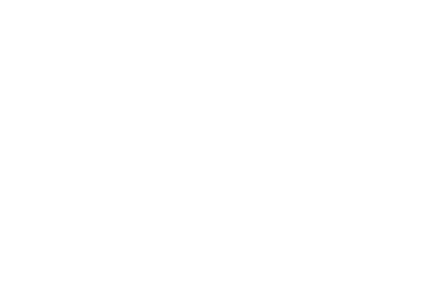

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


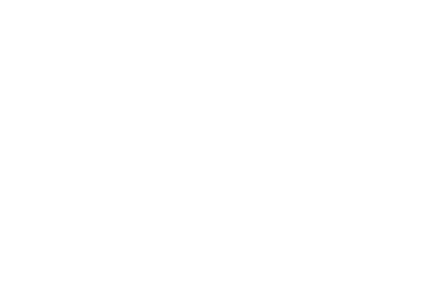

In [27]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [28]:
#### Turn-off automation
#
#%matplotlib notebook
%matplotlib inline

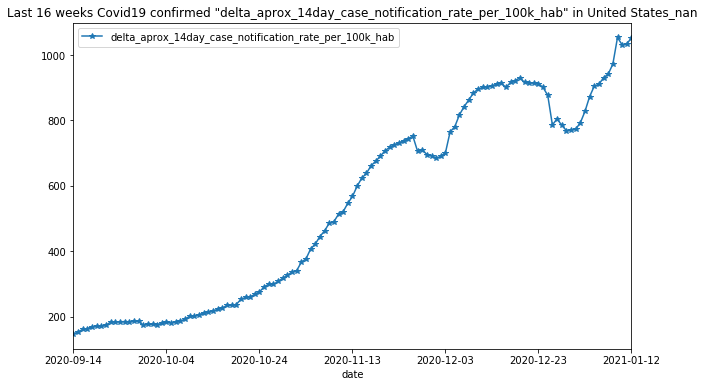

In [29]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

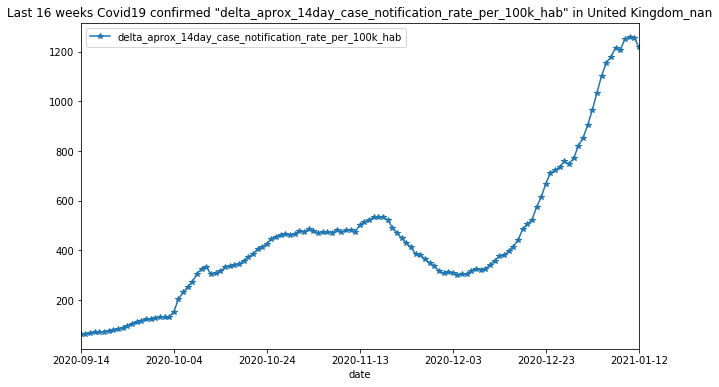

In [30]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

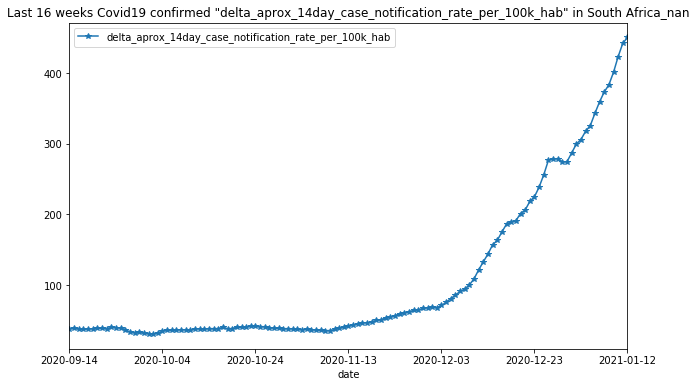

In [31]:
region='South Africa_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

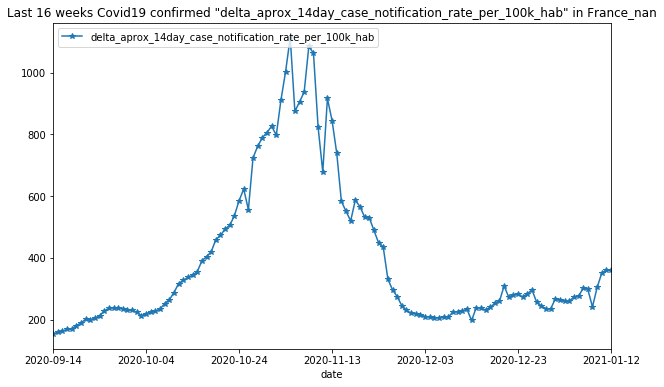

In [32]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

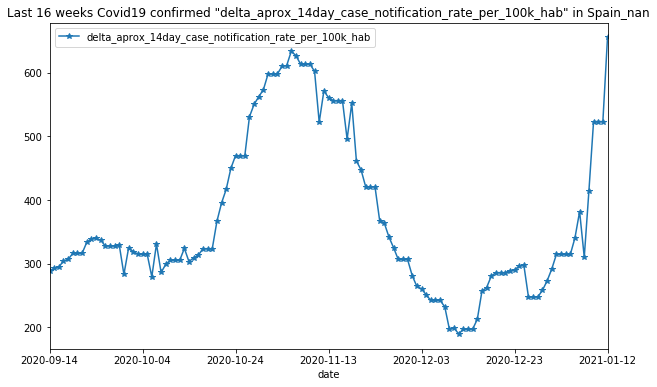

In [33]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

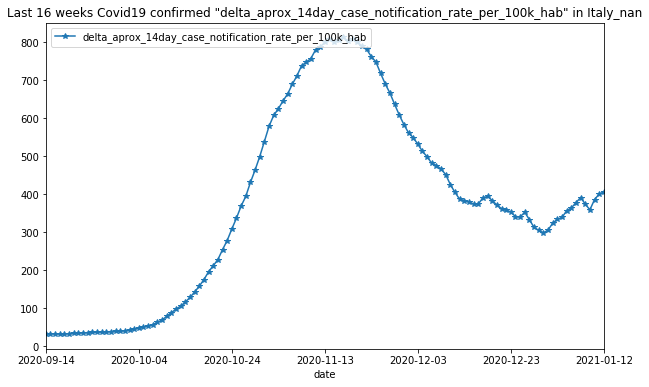

In [34]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

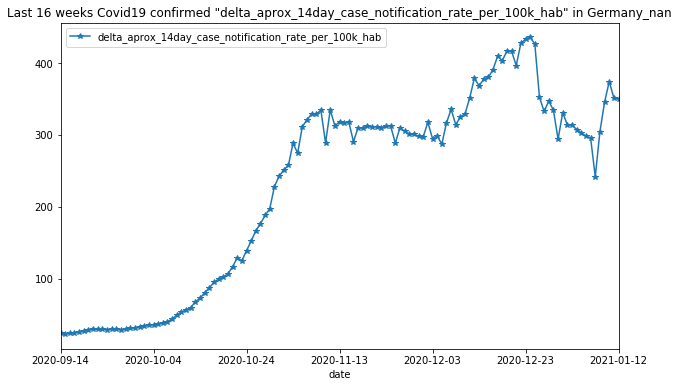

In [35]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

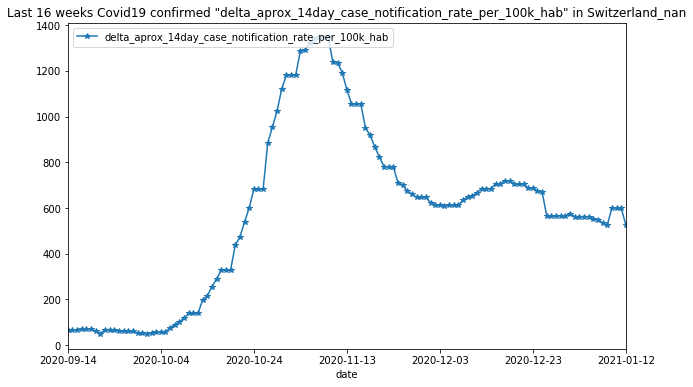

In [36]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

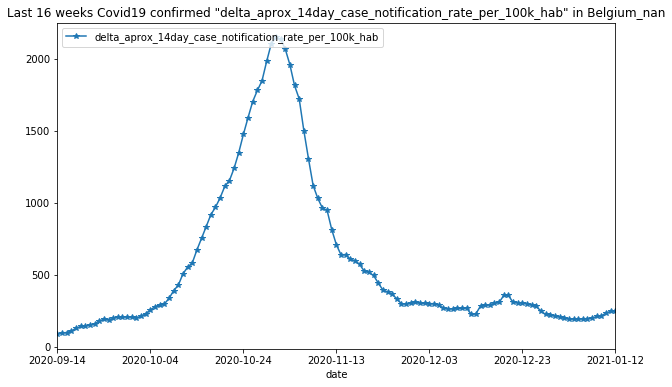

In [37]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

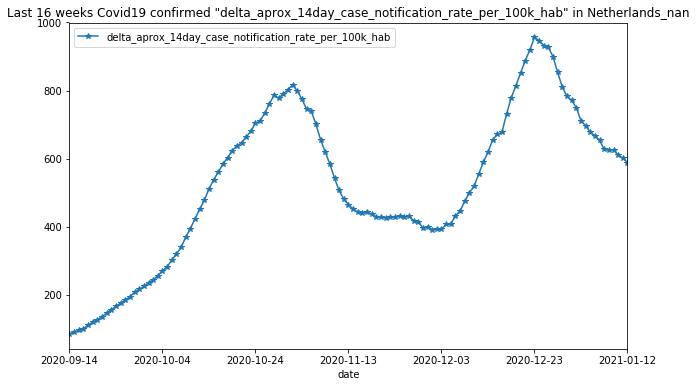

In [38]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

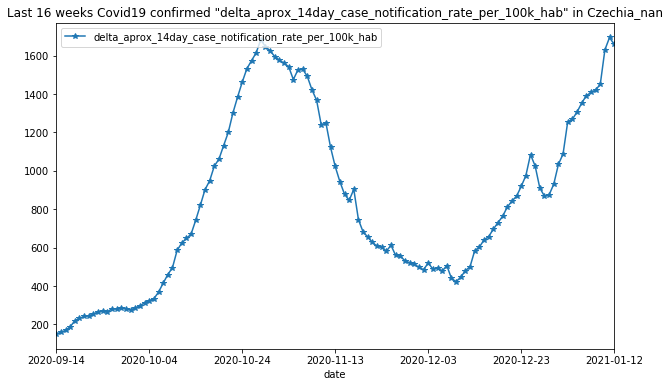

In [39]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

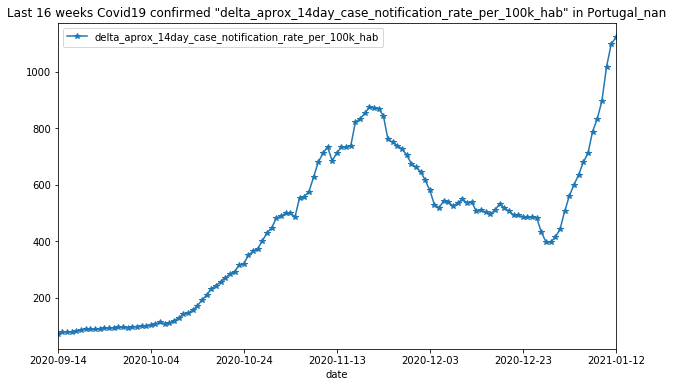

In [40]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [41]:
#%matplotlib notebook
%matplotlib inline

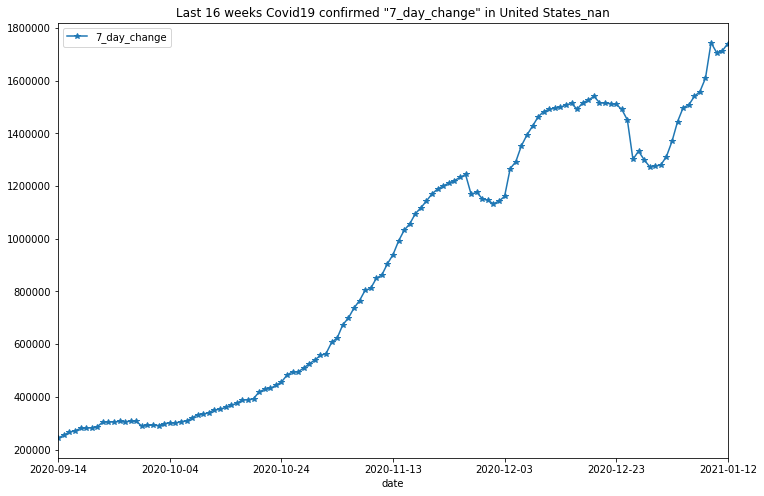

In [42]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

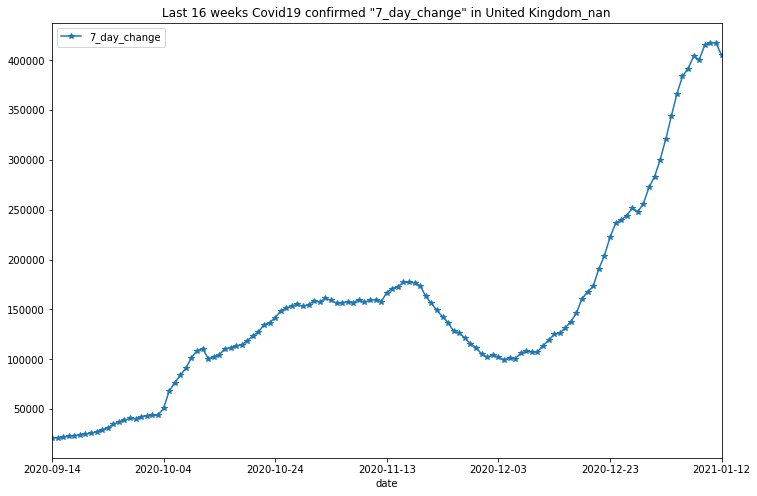

In [43]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

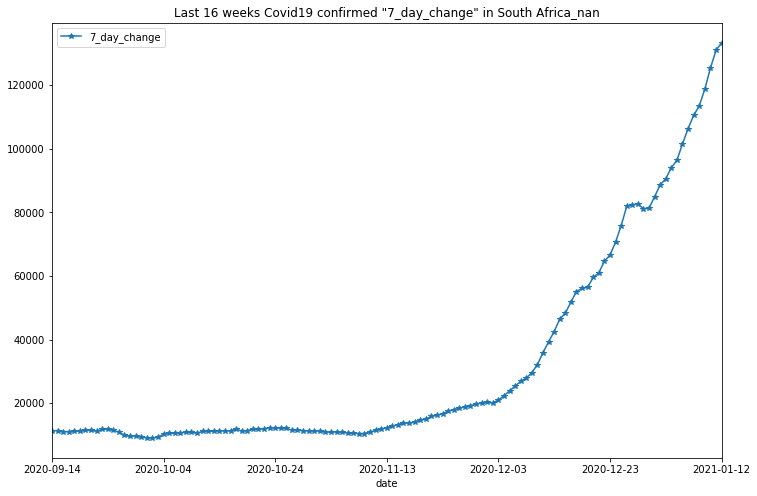

In [44]:
region='South Africa_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

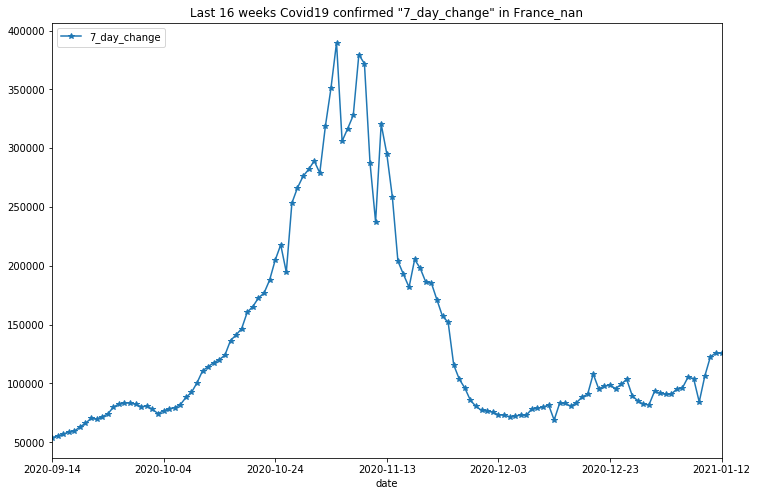

In [45]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

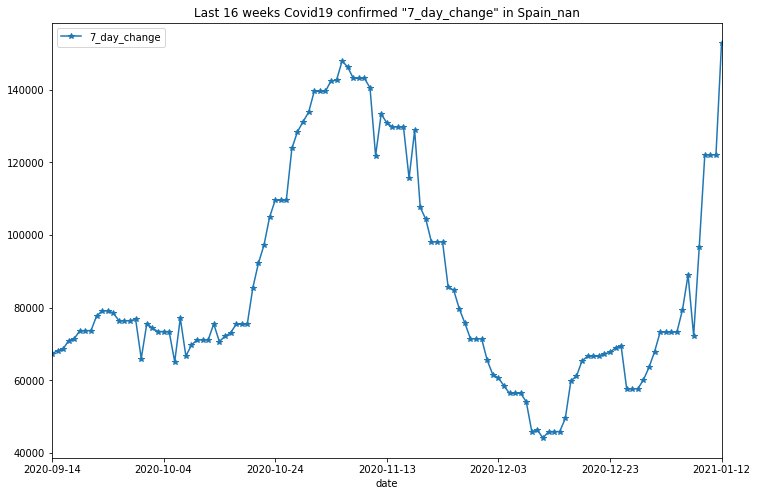

In [46]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

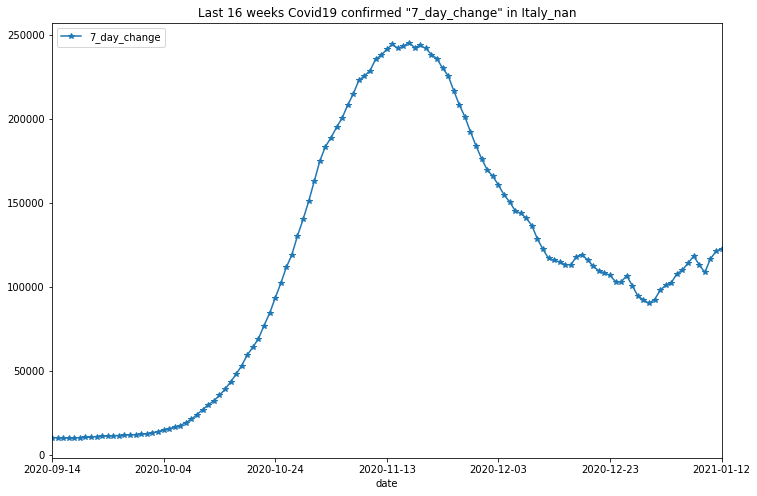

In [47]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

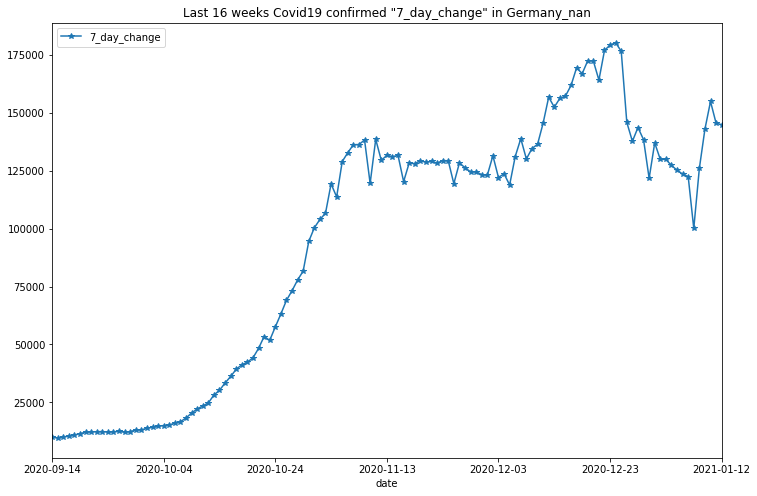

In [48]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

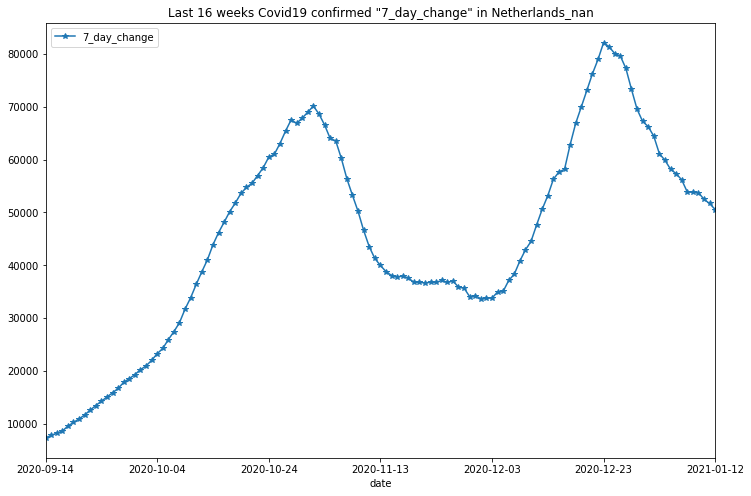

In [49]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

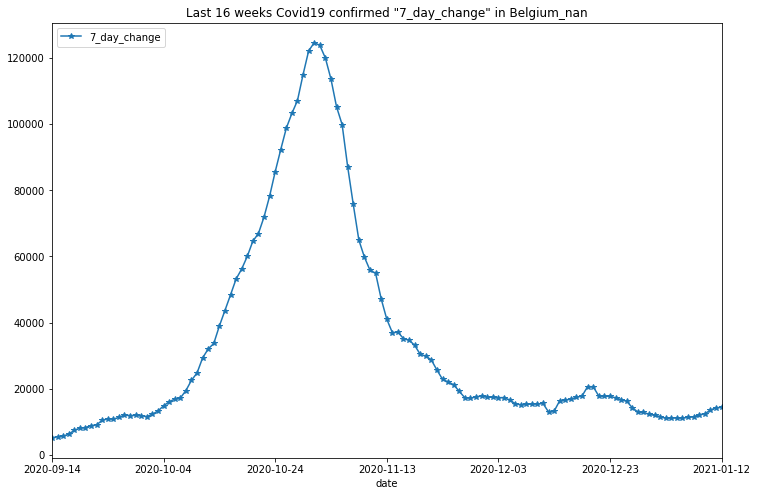

In [50]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

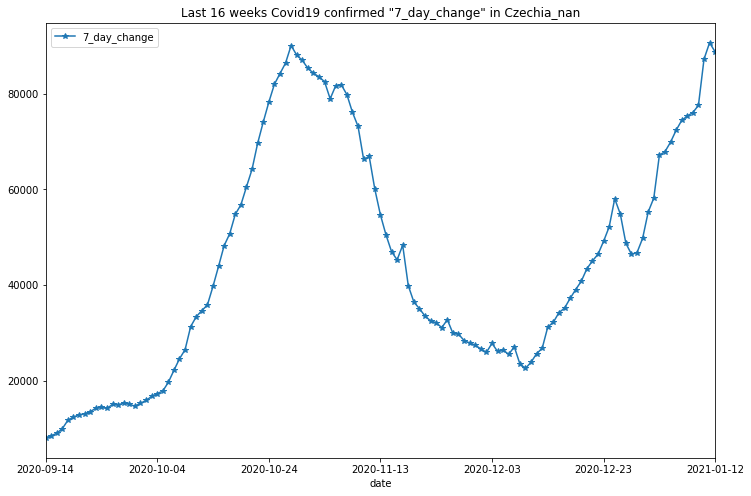

In [51]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

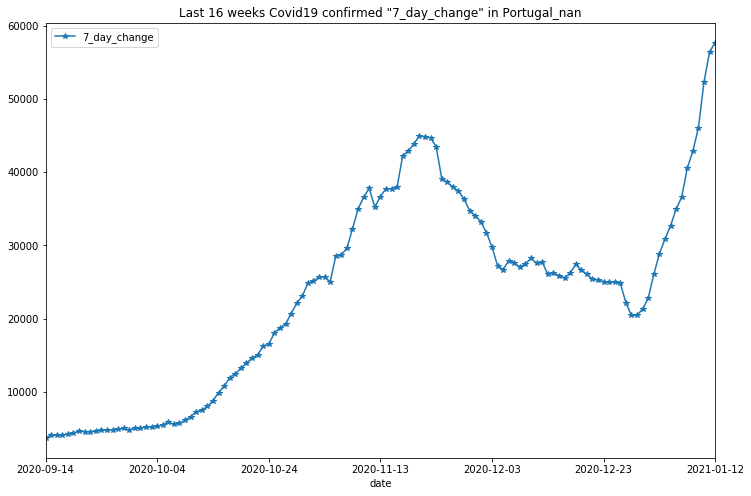

In [52]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [53]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


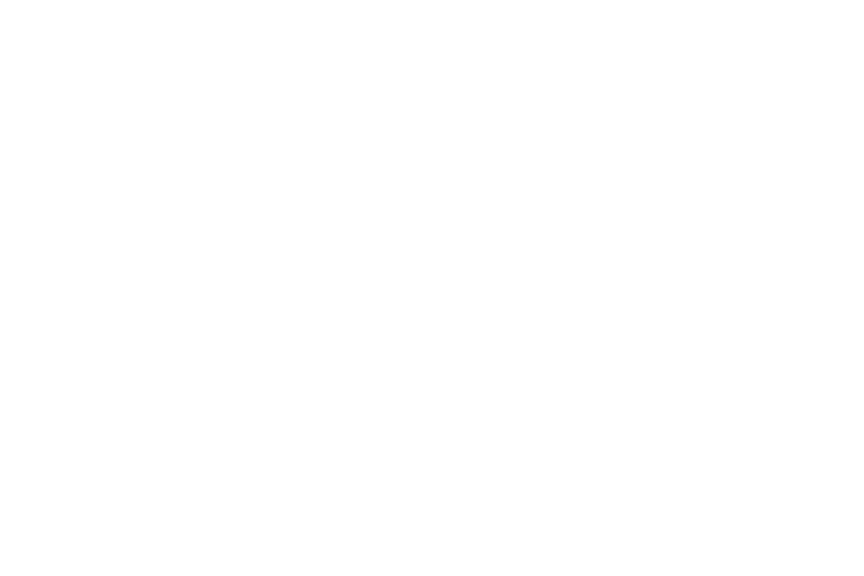

<IPython.core.display.Javascript object>


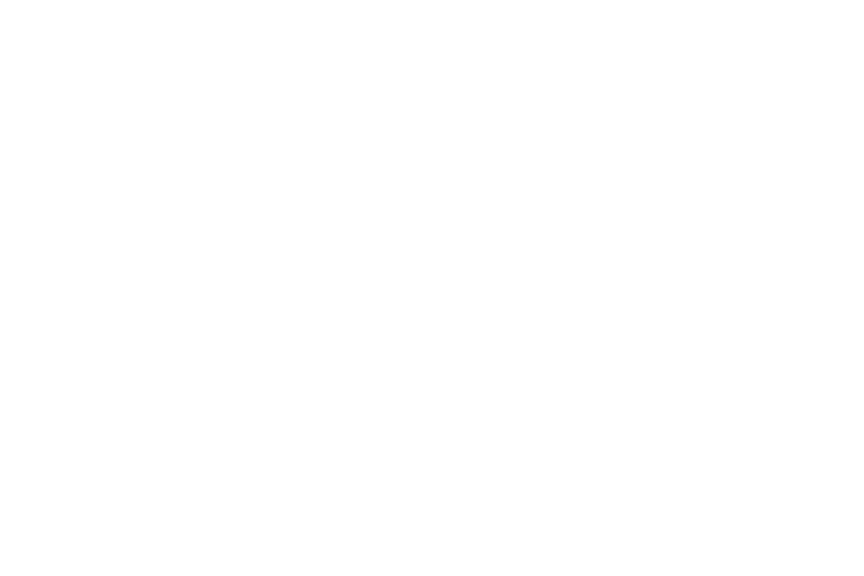

In [54]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


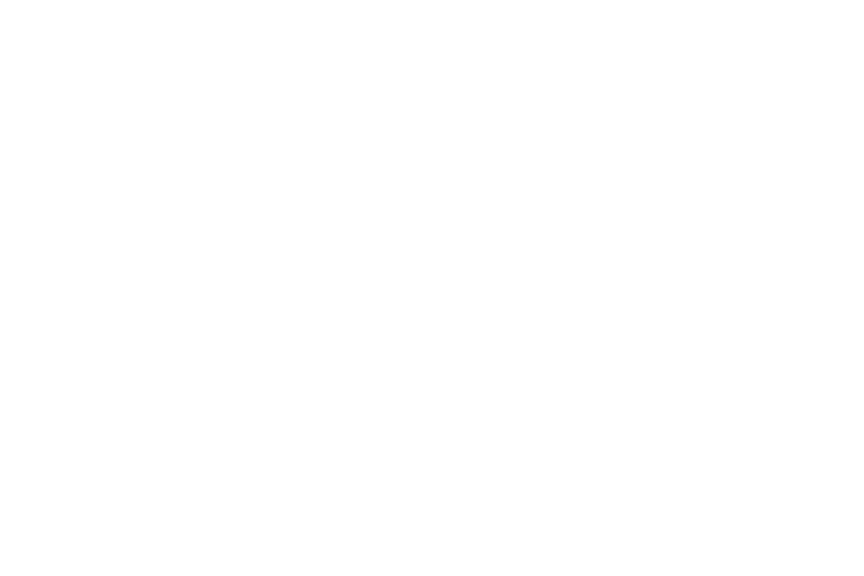

<IPython.core.display.Javascript object>


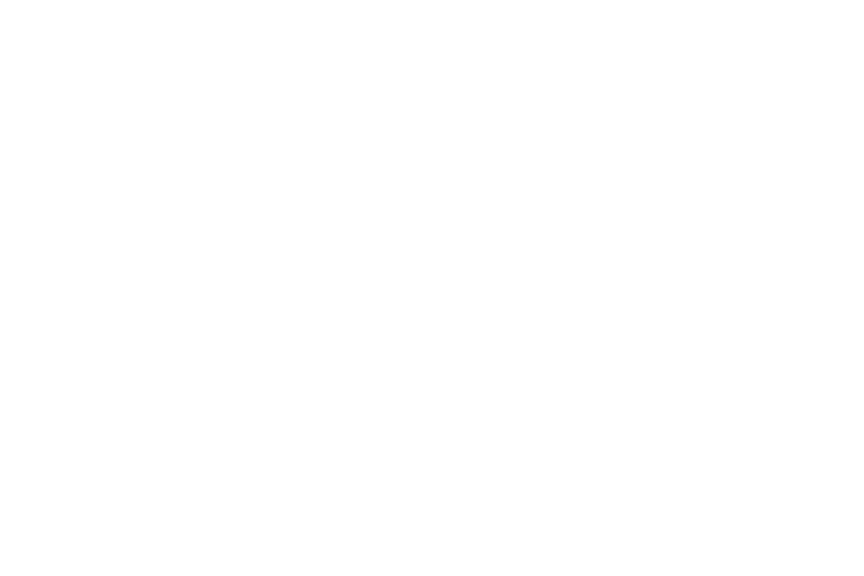

In [55]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


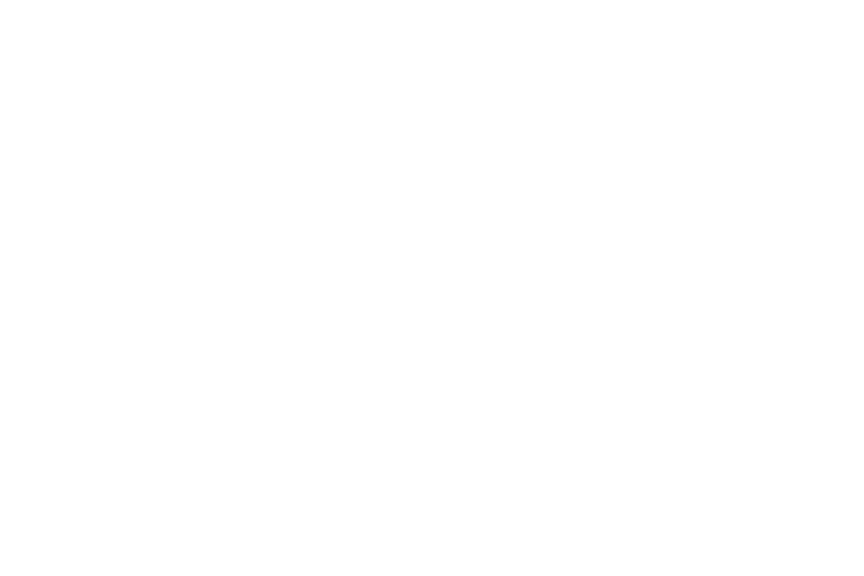

<IPython.core.display.Javascript object>


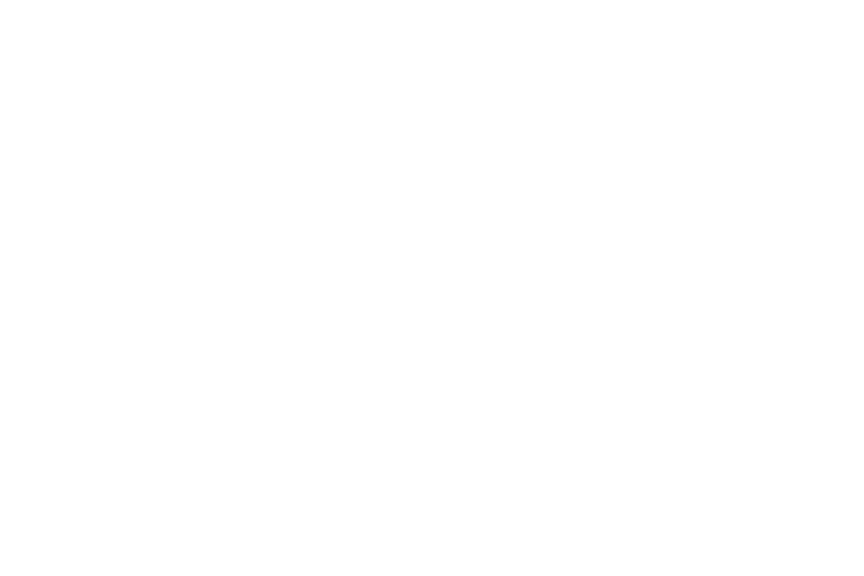

In [56]:
region='South Africa_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


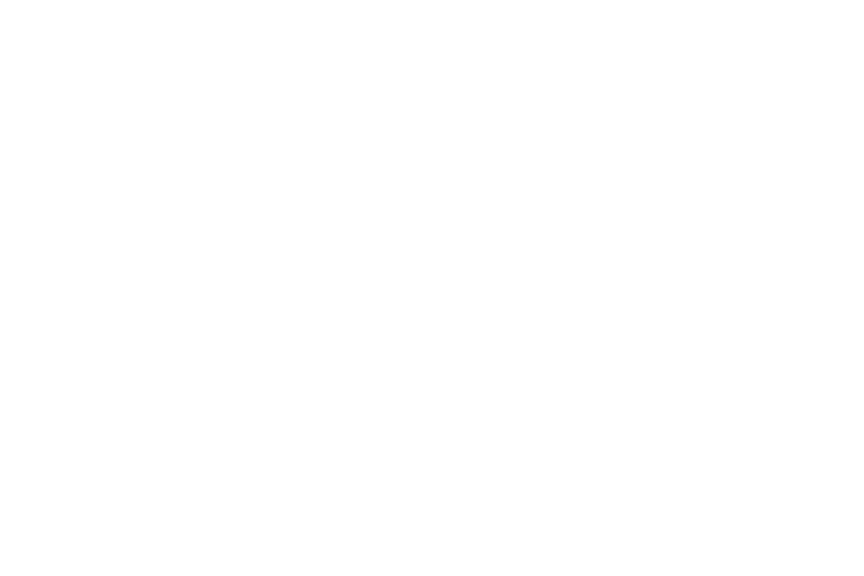

<IPython.core.display.Javascript object>


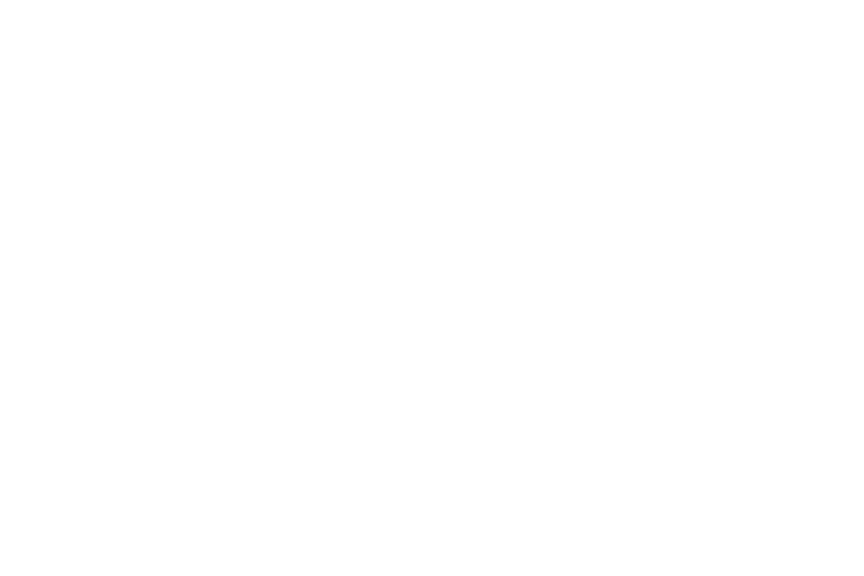

In [57]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


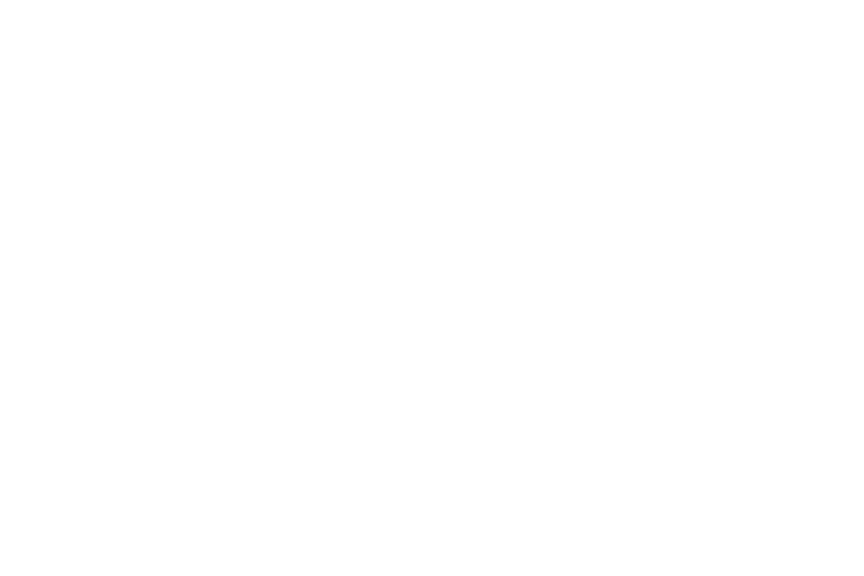

<IPython.core.display.Javascript object>


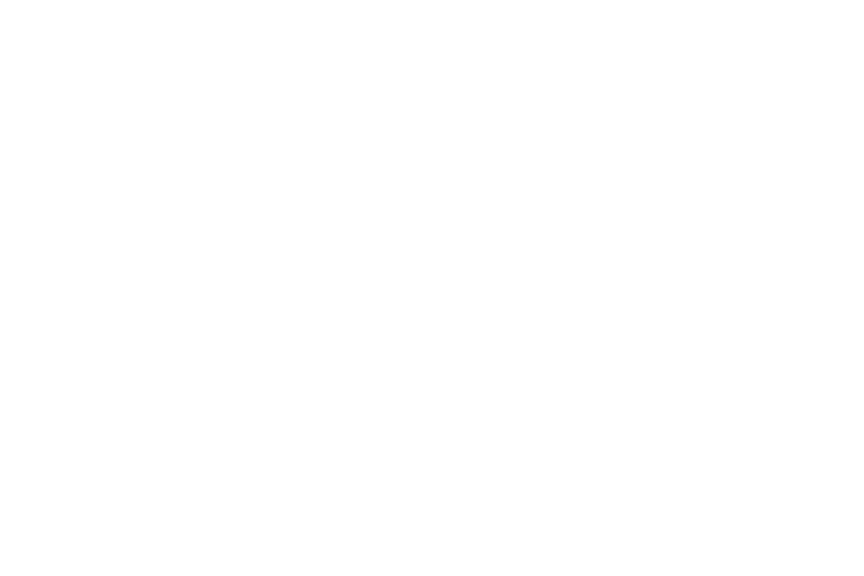

In [58]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


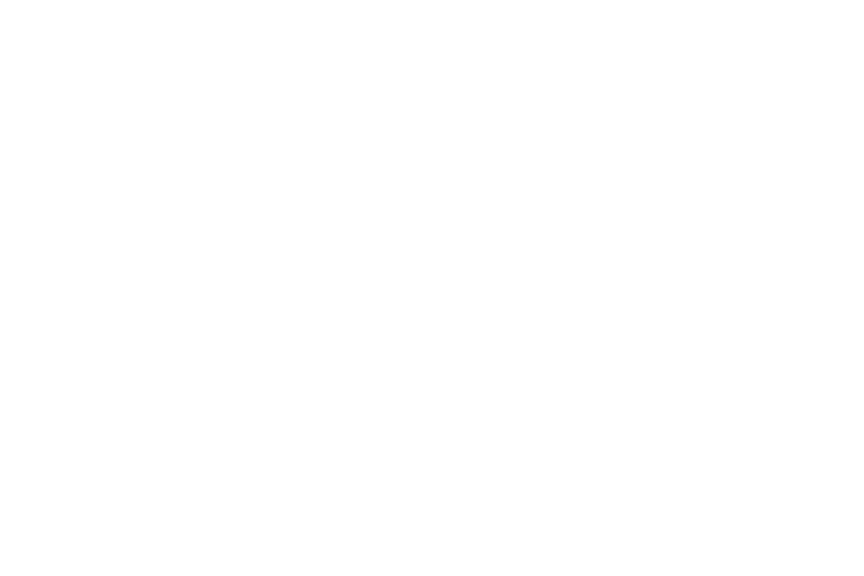

<IPython.core.display.Javascript object>


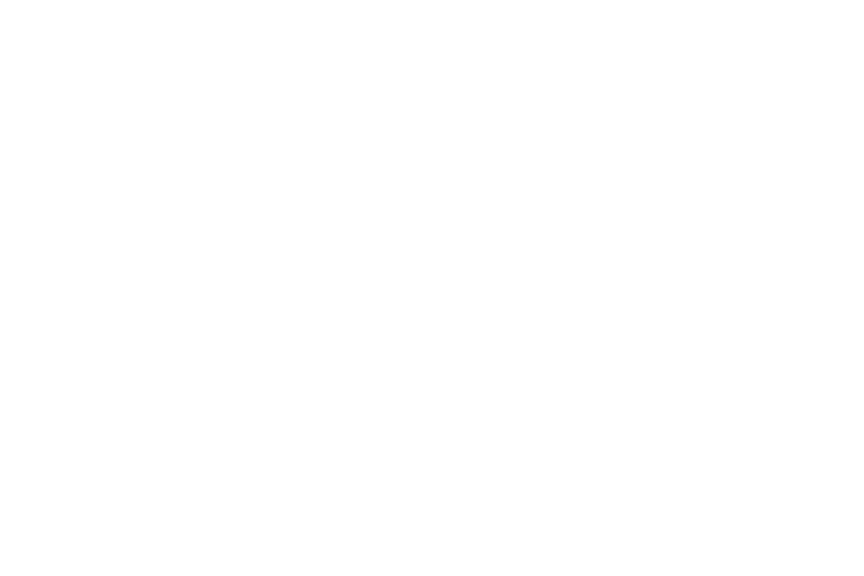

In [59]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


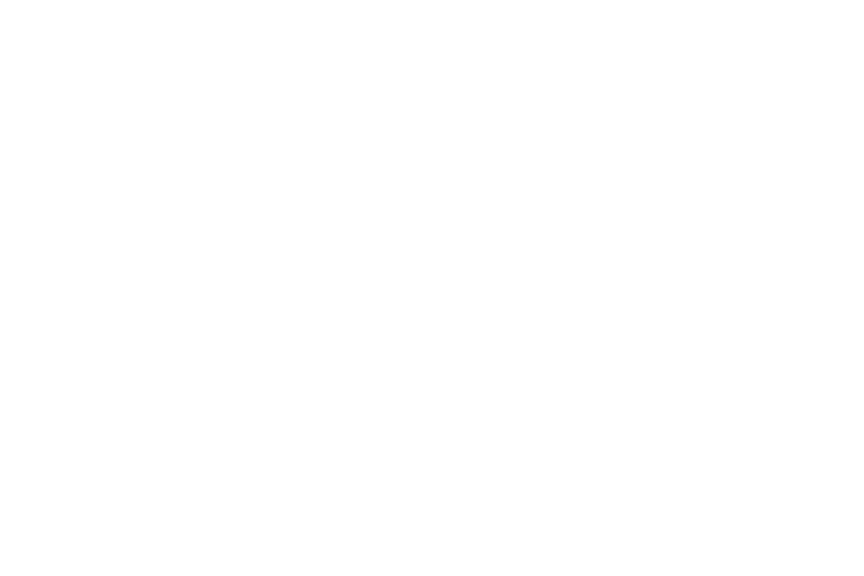

<IPython.core.display.Javascript object>


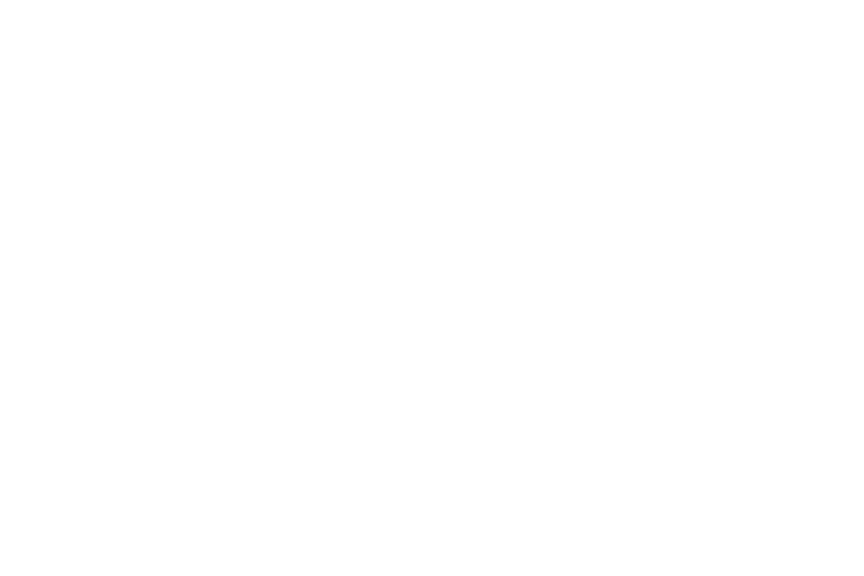

In [60]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


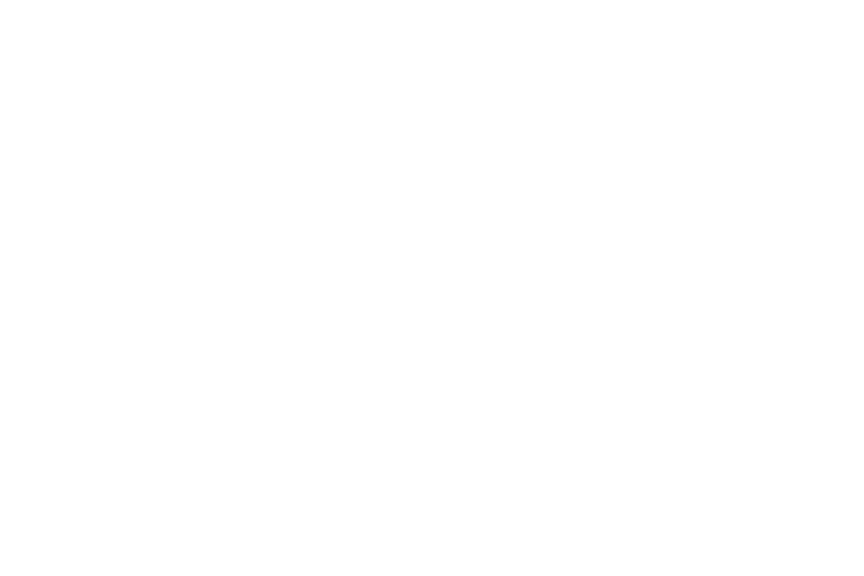

<IPython.core.display.Javascript object>


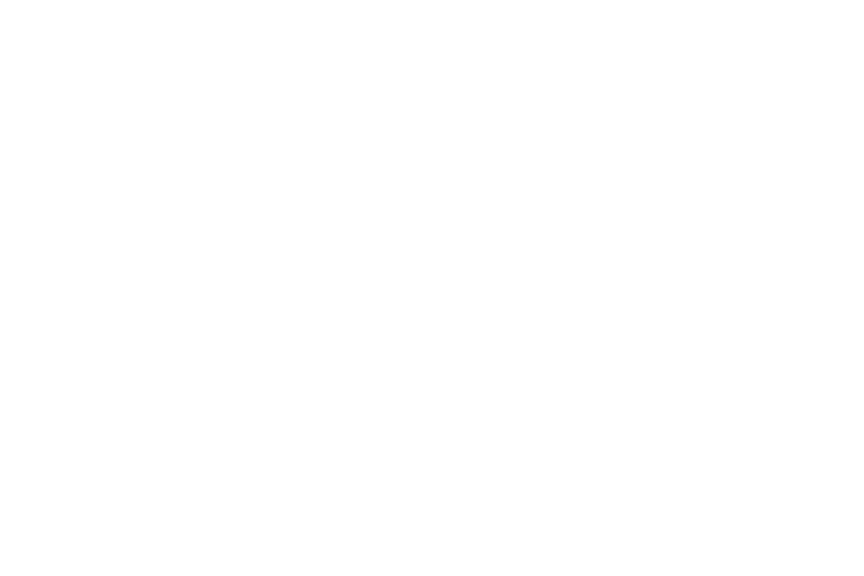

In [61]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


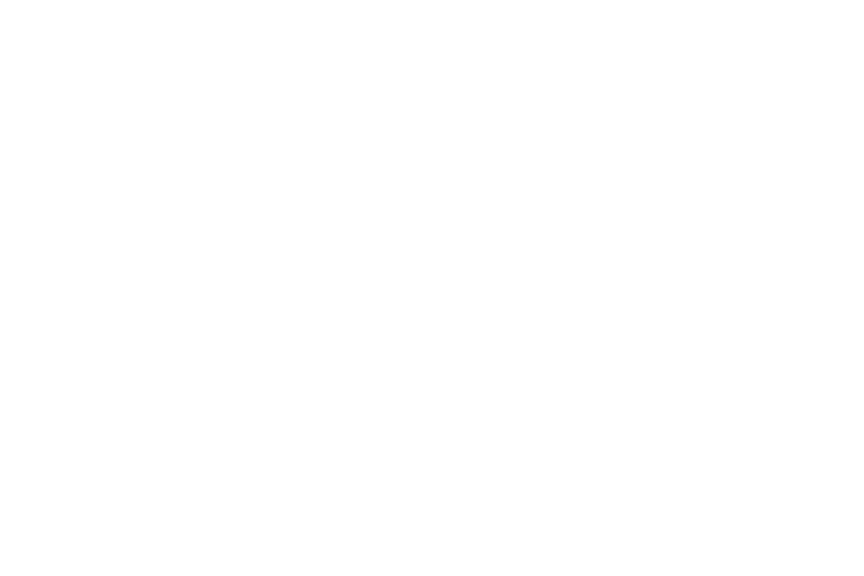

<IPython.core.display.Javascript object>


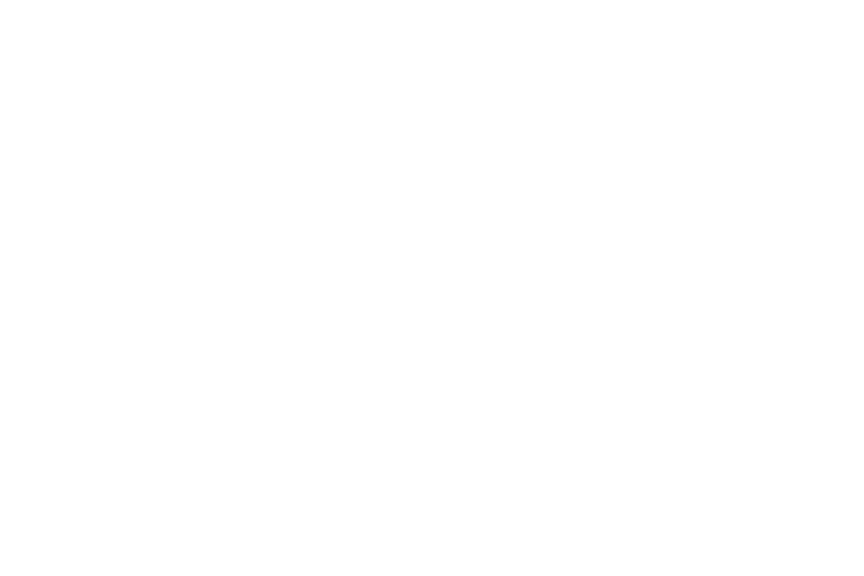

In [62]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


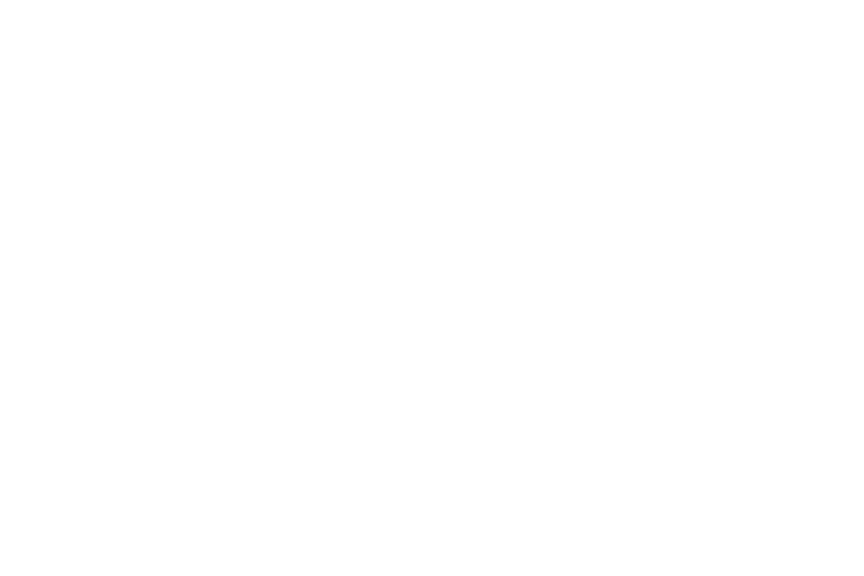

<IPython.core.display.Javascript object>


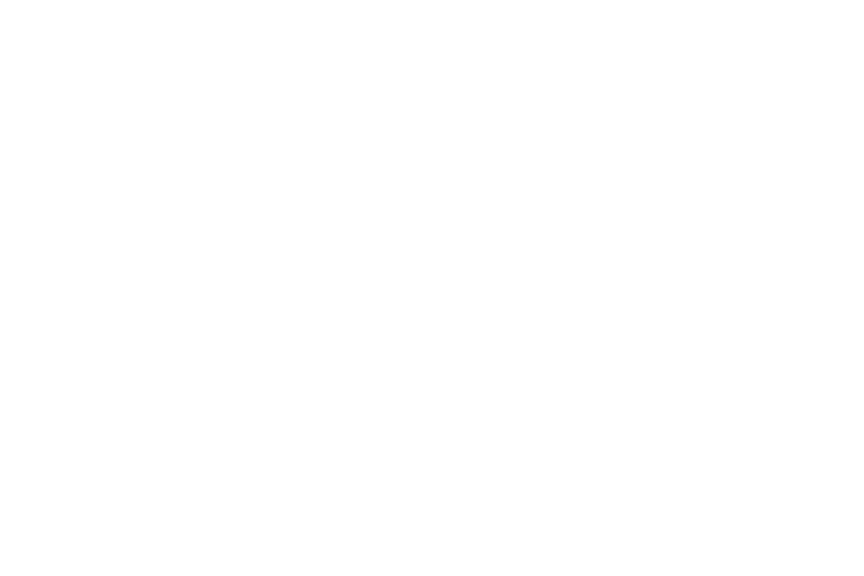

In [63]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


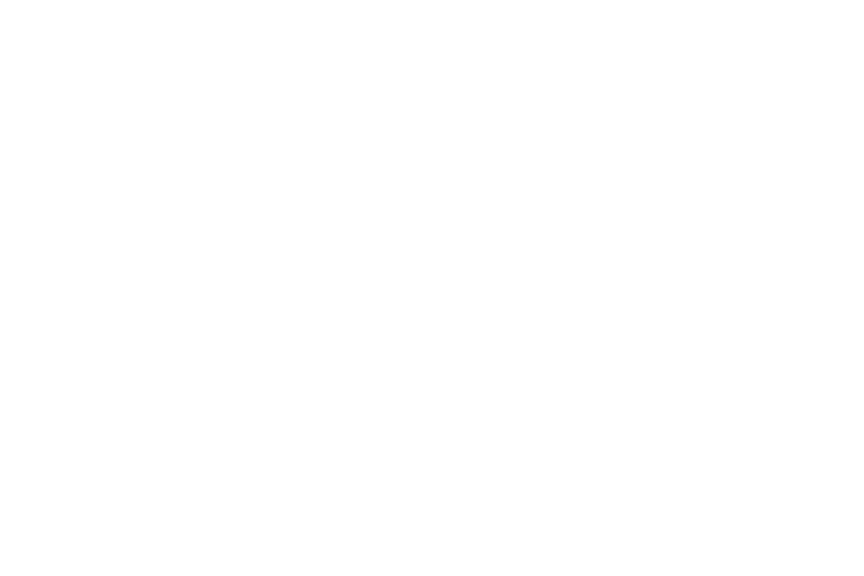

<IPython.core.display.Javascript object>


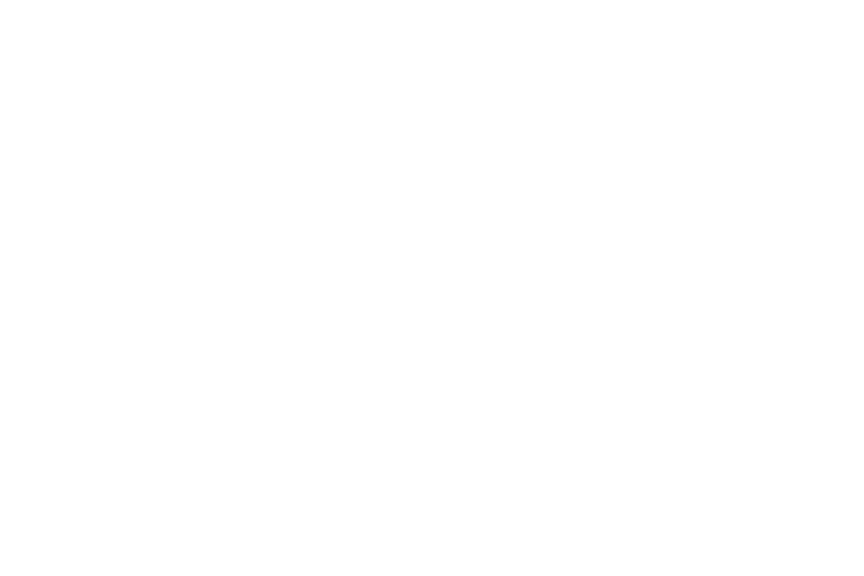

In [64]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


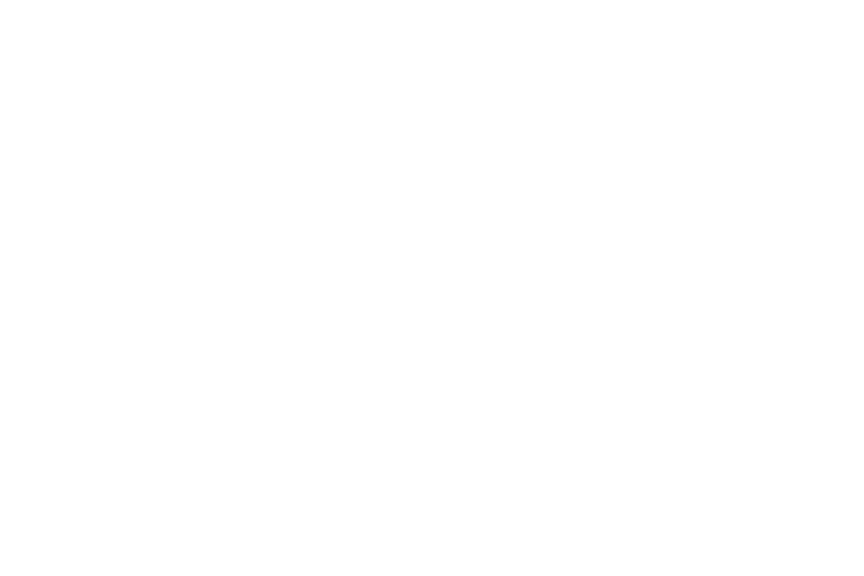

<IPython.core.display.Javascript object>


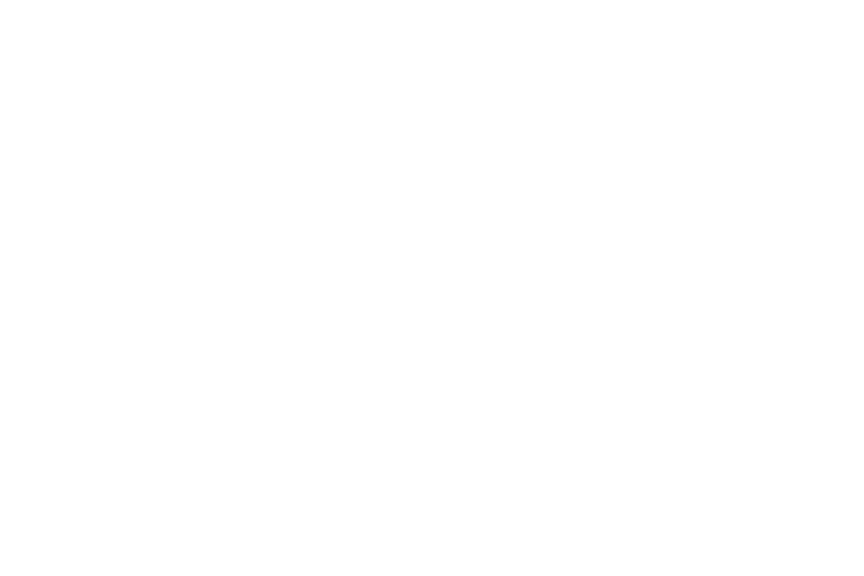

In [65]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [66]:
print("Validation Analysis "+anltdate+" : 1day-Forecast and last 16 weeks plot for https://FuelBigData.com/blog is done!")

Validation Analysis 2021-01-12 : 1day-Forecast and last 16 weeks plot for https://FuelBigData.com/blog is done!


In [67]:
exit()